<a href="https://colab.research.google.com/github/mathewfedrick/Python-Induction-Programme/blob/main/Copy_of_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn
from sklearn import metrics

In [40]:
df = pd.read_csv("Iris.csv")

In [41]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [44]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [45]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [46]:
df.shape

(150, 6)

In [47]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

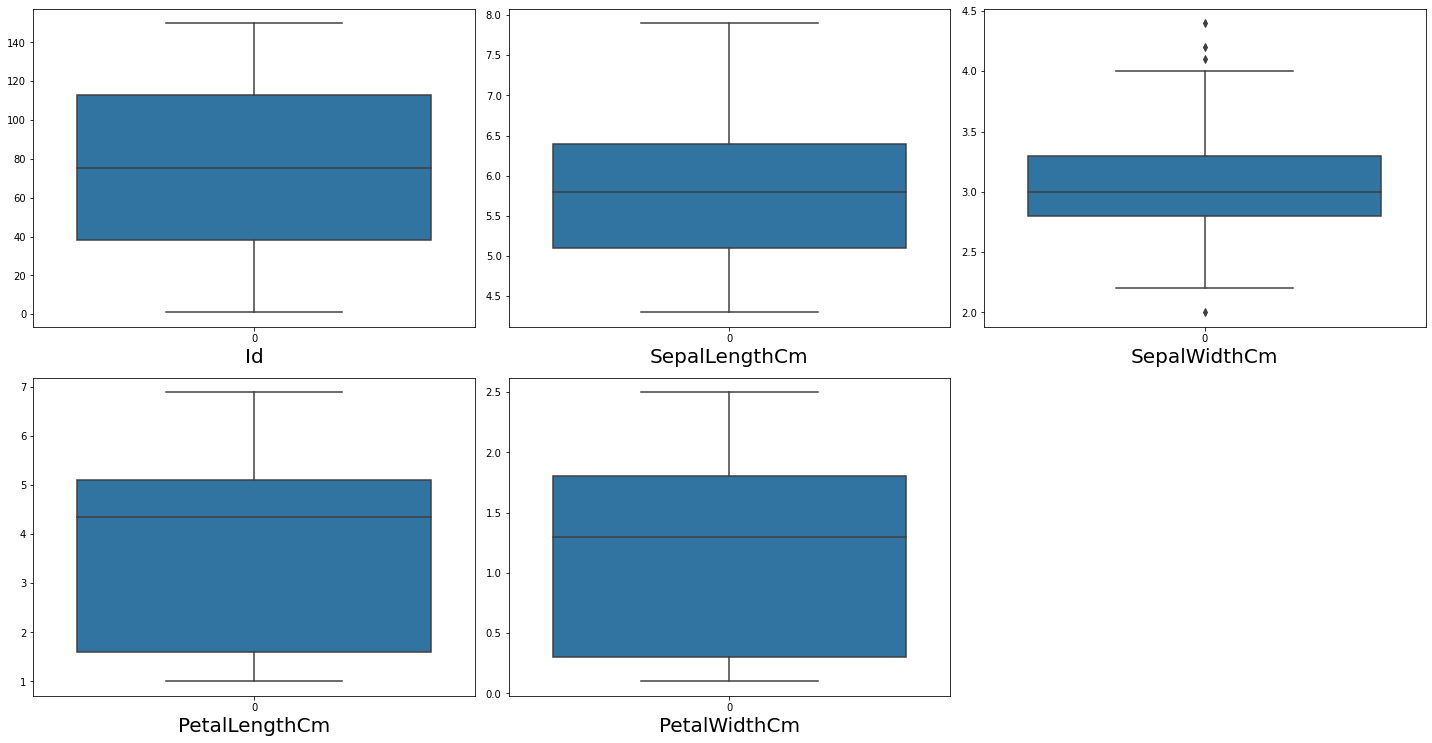

In [49]:
x = df.drop('Species', axis= 1)
y = df['Species']
plt.figure(figsize = (20,15))
plotnumber = 1
for col in x.columns:
    if plotnumber <= 7:
        ax = plt.subplot (3, 3, plotnumber)
        sns.boxplot(x[col])
        plt.xlabel(col, fontsize = 20)
    plotnumber += 1
plt.tight_layout()
plt.show()

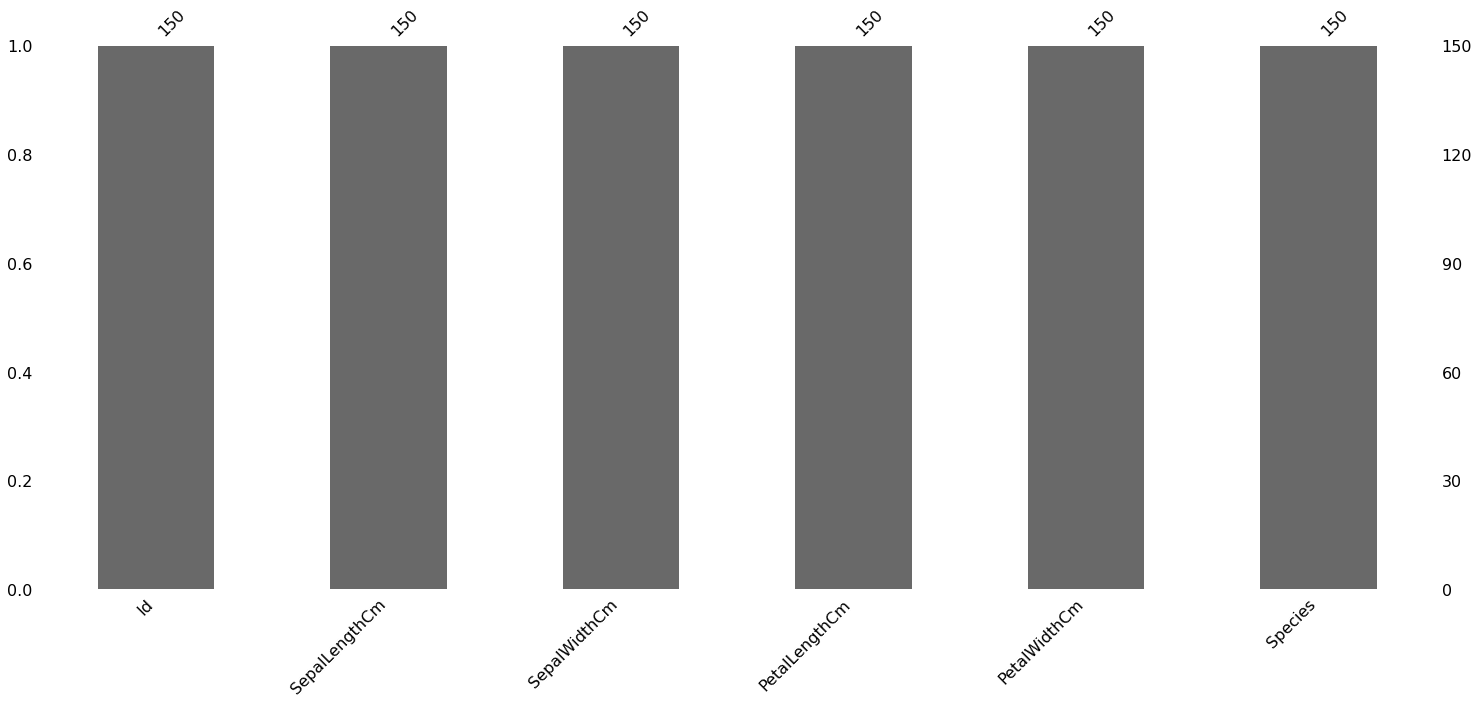

In [50]:
import missingno as mn
mn.bar(df)
plt.show()

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state=0)

In [52]:
a = StandardScaler()
x_train = a.fit_transform(x_train)
x_test = a.transform(x_test)

In [53]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [54]:
y_pred = classifier.predict(x_test)

In [55]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[16,  0,  0],
       [ 0, 21,  0],
       [ 0,  1, 15]])

In [56]:
accuracy_score(y_test, y_pred)

0.9811320754716981

In [57]:
print("Precision :",metrics.precision_score(y_test,y_pred,average='micro'))
print("Recall : ",metrics.recall_score(y_test, y_pred,average='micro'))

Precision : 0.9811320754716981
Recall :  0.9811320754716981
